In [1]:
import numpy as np
import pandas as pd
import scanpy as sc

import sys
sys.path.append("/ahg/regevdata/projects/Cell2CellCommunication/code/MIMOSCA")

import perturbseq as perturb
%matplotlib inline
import matplotlib.pyplot as plt

import sys 
import inspect
import seaborn as sns
import os

sc.settings.verbosity = 3  # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.settings.set_figure_params(dpi=80, color_map='viridis')
sc.logging.print_versions()

scanpy==1.5.1 anndata==0.7.1 umap==0.4.4 numpy==1.17.2 scipy==1.4.1 pandas==0.24.2 scikit-learn==0.22 statsmodels==0.11.0 python-igraph==0.7.1 louvain==0.6.1 leidenalg==0.8.1


In [2]:
PROTEIN='TP53'
DATA='/ahg/regevdata/projects/bn10_cancer_variants/bn10_oana_2018-06-22/results/2018-06-22/results/2020-02-14'
SUBSAMPLED=DATA+'/'+PROTEIN+'/subsampled/A549.'+PROTEIN

counts=20000

FIGS=DATA+'/2021-03-22_Figures/'
os.system('mkdir -p '+FIGS)
print(FIGS)

sc.settings.figdir=FIGS

/ahg/regevdata/projects/bn10_cancer_variants/bn10_oana_2018-06-22/results/2018-06-22/results/2020-02-14/2021-03-22_Figures/


In [3]:
ANNO=DATA+'/'+PROTEIN+'/anno'
anno=pd.read_csv(ANNO+'/'+PROTEIN+'.anno.complete3.csv',sep='\t',index_col=0)

sorted_variants_df=pd.read_csv(DATA+'/'+PROTEIN+'/clustering/'+PROTEIN+'.corrL1.sorted_variants_2021-03-23.csv',header=None)
sorted_variants_df.index=sorted_variants_df[0]
sorted_variants=list(sorted_variants_df[0])
print(sorted_variants)

anno['Nutlin-3, TP53 WT\ngrowth (z-score)']=anno['A549_p53WT_Nutlin-3_Z-score']
anno['Nutlin-3, TP53 null\ngrowth (z-score)']=anno['A549_p53NULL_Nutlin-3_Z-score']
anno['Etoposide, TP53 null\ngrowth (z-score)']=anno['A549_p53NULL_Etoposide_Z-score']

['P359P', 'T170T', 'D21D', 'A83V', 'P295P', 'P153P', 'E2E', 'P47P', 'R158R', 'T118T', 'Q5R', 'G360V', 'V31I', 'P36P', 'P58R', 'P301P', 'L344L', 'P47S', 'P222P', 'T312S', 'WT', 'E339K', 'Y107H', 'S366A', 'V216V', 'R337C', 'R337L', 'unassigned', 'R280K', 'C277F', 'R213Q', 'P152L', 'S241C', 'R273H', 'R273L', 'R273C', 'K132R', 'R158H', 'M246V', 'M237I', 'V272L', 'C242F', 'E271K', 'Y205C', 'G154V', 'Y234C', 'Y220C', 'G266E', 'Y236C', 'R280T', 'R158L', 'R248W', 'C238F', 'Y163C', 'G266V', 'A159V', 'E285K', 'G105C', 'G245C', 'H179R', 'K132N', 'S241F', 'R248L', 'V272M', 'H193R', 'G245S', 'P250L', 'P278L', 'C141Y', 'A159P', 'G244C', 'E286K', 'S127F', 'C238Y', 'V216M', 'V173L', 'V157F', 'C176Y', 'C176F', 'H214R', 'H193Y', 'R110L', 'C135Y', 'R249S', 'R282W', 'L194R', 'G266R', 'R249M', 'G245V', 'C275Y', 'H179Y', 'P151S', 'R175H', 'C135F', 'I195T', 'P278S', 'V173M', 'G245D', 'C275F', 'H193L']


In [4]:
#read in additional datasets
supp=pd.read_csv('/ahg/regevdata/projects/bn10_cancer_variants/bn10_oana_2018-06-22/results/2018-06-22/results/2021-02-01/'+
                'TP53/anno/2019-07-05-TP53_Data_Matrix_SBS_Genome_Predictions.csv')
supp.index=supp['Allele']
supp.head()

POS Allele SilentLetter AA_wt AA_variant Allele.1  Z_APC_NUT  \
Allele                                                                 
M1A       1    M1A          M1A     M          A      M1A  -0.608318   
M1C       1    M1C          M1C     M          C      M1C  -0.874059   
M1D       1    M1D          M1D     M          D      M1D   0.151947   
M1E       1    M1E          M1E     M          E      M1E  -0.604673   
M1F       1    M1F          M1F     M          F      M1F   0.151947   

        Z_A4C_NUT  Z_A4C_ETO  RFS_H1299  ...  PAAD  PRAD  SARC  SKIN_BCC  \
Allele                                   ...                               
M1A     -1.533255  -0.788753        NaN  ...     0     0     0         0   
M1C     -1.676208  -1.969077        NaN  ...     0     0     0         0   
M1D     -0.636225   0.536895        NaN  ...     0     0     0         0   
M1E     -1.696232   1.227243        NaN  ...     0     0     0         0   
M1F     -0.636225   0.536895        NaN  ...     0     0     0         0   

        SKIN_MEL  SKIN_SqCC  STAD  UCEC  UTUC  Total  
Allele                                                
M1A            0          0     0     0     0      0  
M1C            0          0     0     0     0      0  
M1D            0          0     0     0     0      0  
M1E            0          0     0     0     0      0  
M1F            0          0     0     0     0      0  

[5 rows x 180 columns]

'WAF1nWT','MDM2nWT','BAXnWT','h1433snWT','AIP1nWT','GADD45nWT','NOXAnWT','P53R2nWT'
 --
Kato et al. PNAS 2003 created an arrayed library of all possible
single nucleotide change p53 mutants and tested their ability to
activate 8 different reporter constructs in yeast. The inability to
produce a fluorescent output indicated loss-of-function.

RFS_H1299
--

Kotler et al. Molecular Cell 2018 introduced a large library
comprising nearly all DBD mutants into p53 NULL H1299 lung cancer
cells and performed a pooled proliferation screen. Increased
proliferation indicated loss-of-function.

'RFS_HCT116','RFS_HCT116_InVivo'
--

In the Kotler et al. paper, they also introduced a small subset of
these mutants in HCT116 colorectal cancer cells that were engineered
to be p53 NULL. They tested these in a pooled 3D proliferation screen
in vitro (whose data is well-correlated with all other data sets) as
well as an in vivo pooled screen (which is not correlated with any of
the other data sets and is probably just noise). In the HCT116 in
vitro screen, increased proliferation indicated of loss-of-function.
There are very few alleles in these HCT116 screens (~100?), so it may
not even be worth looking at this.

'K562_NUT','K562_DMSO'
--

Boettcher et al. Science 2019 introduced our p53 MITE library into
K562 cells that harbored a GFP construct driven by a p21 promoter.
They then treated the cells with DMSO or Nutlin-3, sorted GFP-hi and
GFP-low cells, and sequenced the constructs. p53 mutants that led to
low GFP levels indicated dominant-negative effects.


In [5]:
assays=['Z_APC_NUT',
 'Z_A4C_NUT',
 'Z_A4C_ETO',
 'RFS_H1299',
 #'RFS_HCT116',
 #'RFS_HCT116_InVivo',
 'K562_NUT',
 'K562_DMSO',
 'WAF1nWT',
 'MDM2nWT',
 'BAXnWT',
 'h1433snWT',
 'AIP1nWT',
 'GADD45nWT',
 'NOXAnWT',
 'P53R2nWT',]
for a in assays:
    print(a)
    anno[a]=supp.loc[anno.index,a]
assays.append('HotellingT2')

Z_APC_NUT
Z_A4C_NUT
Z_A4C_ETO
RFS_H1299
K562_NUT
K562_DMSO
WAF1nWT
MDM2nWT
BAXnWT
h1433snWT
AIP1nWT
GADD45nWT
NOXAnWT
P53R2nWT


/ahg/regevdata/users/oursu/software/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:1017: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return getattr(section, self.name)[new_key]


In [6]:
def fun_scatter(x,y,xname='x',yname='y',corrtype='spearman',
                xlim=None,ylim=None,ax=None,
                **kwargs):
    from scipy.stats import spearmanr, pearsonr
    if corrtype=='spearman':
        corr=spearmanr(x,y,nan_policy='omit')
    if corrtype=='pearson':
        corr=pearsonr(x,y)
    c,p="%.2g" % corr[0],"%.3g" % corr[1]
    
    ax.scatter(x,y,**kwargs)
    ax.set_xlabel(xname)
    ax.set_ylabel(yname)
    if xlim!=None:
        ax.set_xlim(xlim)
    if ylim!=None:
        ax.set_ylim(ylim)
    ax.set_title(corrtype+':'+str(c)+','+'p:'+str(p))

0 0
doing 0 0
0 1
doing 0 1
0 2
doing 0 2
0 3
doing 0 3
0 4
doing 0 4
0 5
doing 0 5
0 6
doing 0 6
0 7
doing 0 7
0 8
doing 0 8
0 9
doing 0 9
0 10
doing 0 10
0 11
doing 0 11
0 12
doing 0 12
0 13
doing 0 13
0 14
doing 0 14
0 15
doing 0 15
0 16
doing 0 16
1 0
1 1
doing 1 1
1 2
doing 1 2
1 3
doing 1 3
1 4
doing 1 4
1 5
doing 1 5
1 6
doing 1 6
1 7
doing 1 7
1 8
doing 1 8
1 9
doing 1 9
1 10
doing 1 10
1 11
doing 1 11
1 12
doing 1 12
1 13
doing 1 13
1 14
doing 1 14
1 15
doing 1 15
1 16
doing 1 16
2 0
2 1
2 2
doing 2 2
2 3
doing 2 3
2 4
doing 2 4
2 5
doing 2 5
2 6
doing 2 6
2 7
doing 2 7
2 8
doing 2 8
2 9
doing 2 9
2 10
doing 2 10
2 11
doing 2 11
2 12
doing 2 12
2 13
doing 2 13
2 14
doing 2 14
2 15
doing 2 15
2 16
doing 2 16
3 0
3 1
3 2
3 3
doing 3 3
3 4
doing 3 4
3 5
doing 3 5
3 6
doing 3 6
3 7
doing 3 7
3 8
doing 3 8
3 9
doing 3 9
3 10
doing 3 10
3 11
doing 3 11
3 12
doing 3 12
3 13
doing 3 13
3 14
doing 3 14
3 15
doing 3 15
3 16
doing 3 16
4 0
4 1
4 2
4 3
4 4
doing 4 4
4 5
doing 4 5
4 6
doin

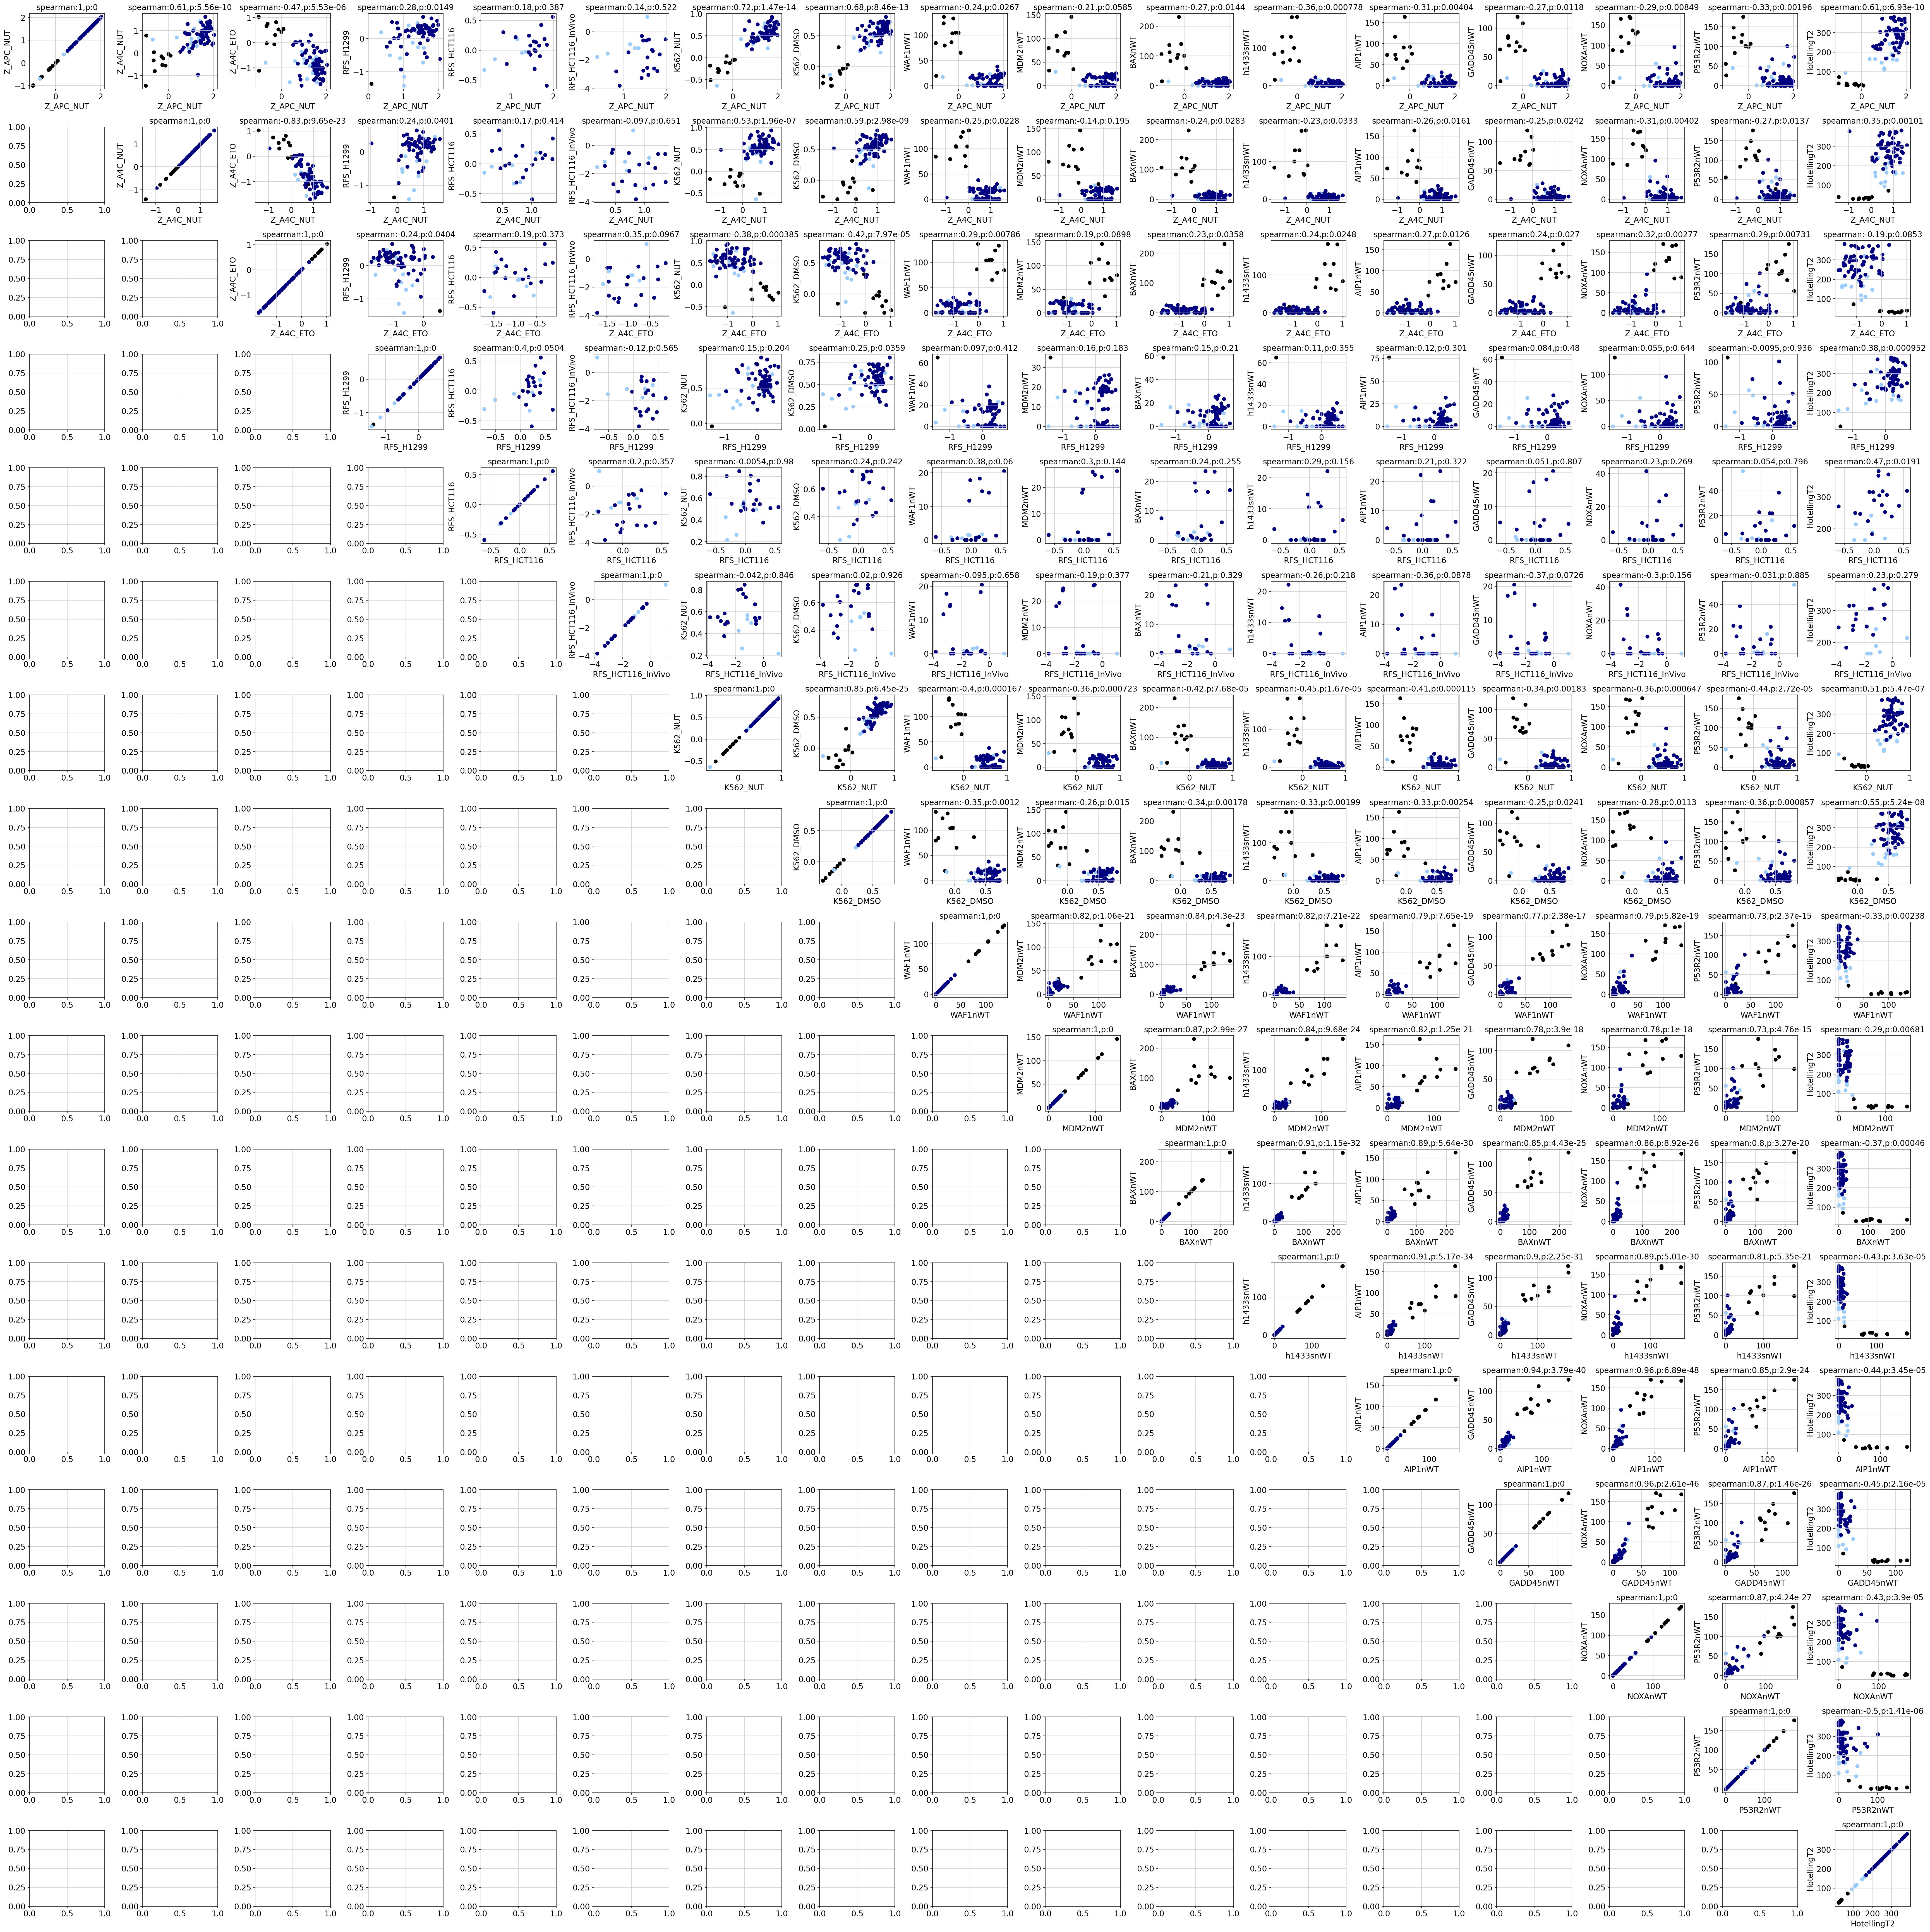

In [8]:
fig,plots=plt.subplots(len(assays),len(assays))
fig.set_size_inches(60,60)
fig.subplots_adjust(hspace=0.5,wspace=0.5)


for a1_idx in range(len(assays)):
    a1=assays[a1_idx]
    for a2_idx in range(len(assays)):
        a2=assays[a2_idx]
        print(a1_idx,a2_idx)
        if a1_idx>a2_idx:
            continue
        print('doing',a1_idx,a2_idx)
        
        fun_scatter(anno.loc[sorted_variants,a1],anno.loc[sorted_variants,a2],
            c=list(anno.loc[sorted_variants,'cluster_color']),ax=plots[a1_idx,a2_idx],
               xname=a1,yname=a2)

In [31]:
corr=pd.DataFrame(0,index=assays,columns=assays)

from scipy.stats import spearmanr
for a1_idx in range(len(assays)):
    a1=assays[a1_idx]
    for a2_idx in range(len(assays)):
        a2=assays[a2_idx]
        if a1_idx>a2_idx:
            continue
        #print('doing',a1_idx,a2_idx)
        a1_values=anno.loc[sorted_variants,a1]
        if 'WT' in a1 or 'ETO' in a1:
            a1_values=-anno.loc[sorted_variants,a1]
            
        a2_values=anno.loc[sorted_variants,a2]
        if 'WT' in a2 or 'ETO' in a2:
            a2_values=-anno.loc[sorted_variants,a2]
        corr.loc[a1,a2]=spearmanr(a1_values,a2_values,nan_policy='omit')[0]
        corr.loc[a2,a1]=corr.loc[a1,a2]

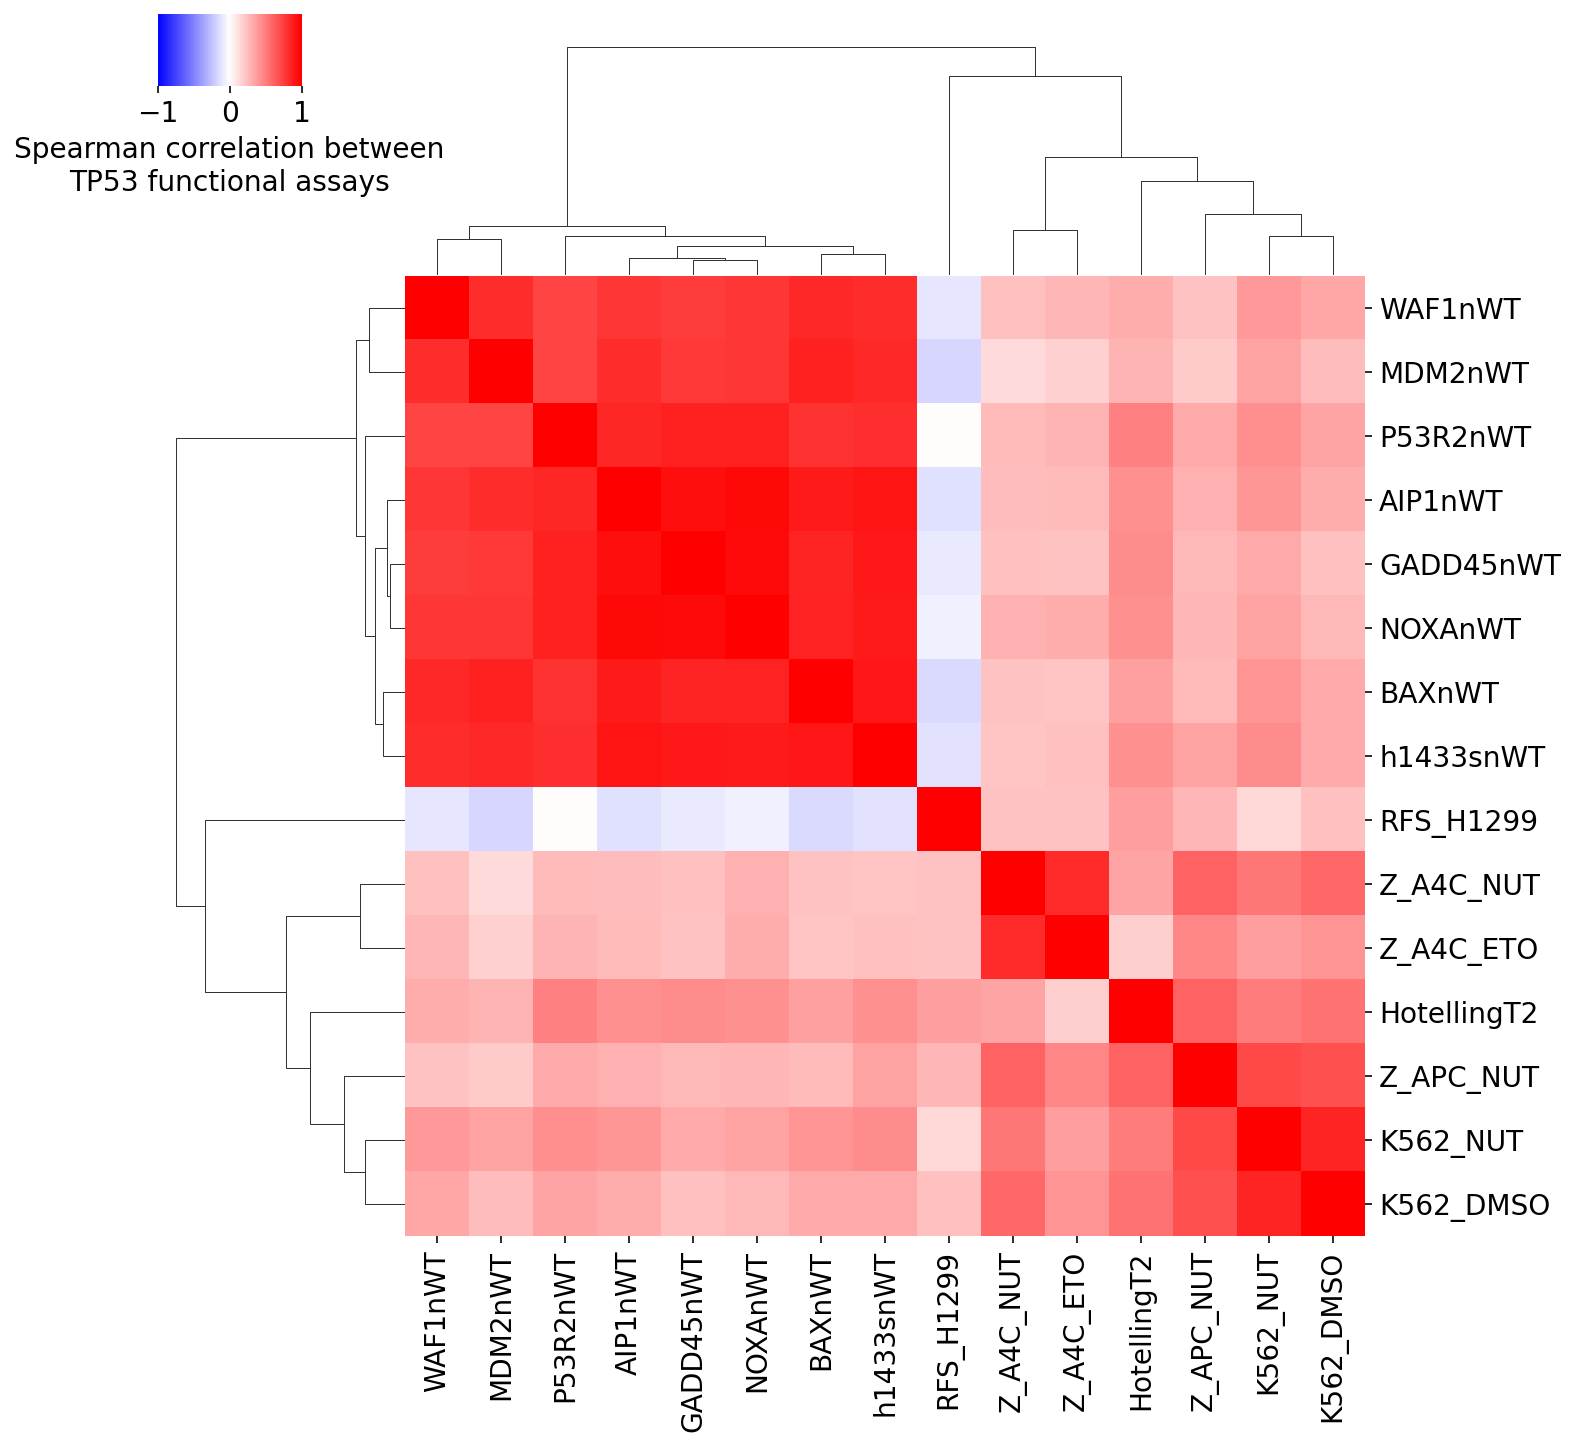

In [48]:
x=1
sns.clustermap(corr,vmin=-x,vmax=x,cmap='bwr',
               cbar_pos=(0.01,0.95,0.1,0.05),
               cbar_kws={'orientation':'horizontal',
                        'label':'Spearman correlation between\nTP53 functional assays'}
               #col_cluster=False,row_cluster=False,
              )

In [7]:
anno.columns

Index(['Variant.1', 'Variant.1.1', 'Position', 'From', 'To', 'mutation_type',
       'Count_pancan', 'Count_ExAC', 'control_status', 'control_color',
       'Library_synthesis', 'long_name', 'control_status2', 'text_color',
       'HotellingT2', 'HotellingT2.q', 'cluster_color', 'cluster_color2',
       'control_color2', 'cluster_name', 'cluster_name2',
       'Normalized variant barcode counts (TP10K)',
       'A549_p53WT_Nutlin-3_Z-score', 'A549_p53NULL_Nutlin-3_Z-score',
       'A549_p53NULL_Etoposide_Z-score', 'Nutlin-3, TP53 WT\ngrowth (z-score)',
       'Nutlin-3, TP53 null\ngrowth (z-score)',
       'Etoposide, TP53 null\ngrowth (z-score)', 'Z_APC_NUT', 'Z_A4C_NUT',
       'Z_A4C_ETO', 'RFS_H1299', 'K562_NUT', 'K562_DMSO', 'WAF1nWT', 'MDM2nWT',
       'BAXnWT', 'h1433snWT', 'AIP1nWT', 'GADD45nWT', 'NOXAnWT', 'P53R2nWT'],
      dtype='object')

In [18]:
anno['sc-eVIP score']=anno['HotellingT2']

In [19]:
assays=['Nutlin-3, TP53 WT\ngrowth (z-score)',
       'Nutlin-3, TP53 null\ngrowth (z-score)',
       'Etoposide, TP53 null\ngrowth (z-score)',
       'sc-eVIP score']
corr=pd.DataFrame(0,index=assays,columns=assays)


from scipy.stats import spearmanr
for a1_idx in range(len(assays)):
    a1=assays[a1_idx]
    for a2_idx in range(len(assays)):
        a2=assays[a2_idx]
        if a1_idx>a2_idx:
            continue
        #print('doing',a1_idx,a2_idx)
        a1_values=anno.loc[sorted_variants,a1]
        if 'Eto' in a1:
            a1_values=-anno.loc[sorted_variants,a1]
            
        a2_values=anno.loc[sorted_variants,a2]
        if 'Eto' in a2:
            a2_values=-anno.loc[sorted_variants,a2]
        corr.loc[a1,a2]=spearmanr(a1_values,a2_values,nan_policy='omit')[0]
        corr.loc[a2,a1]=corr.loc[a1,a2]

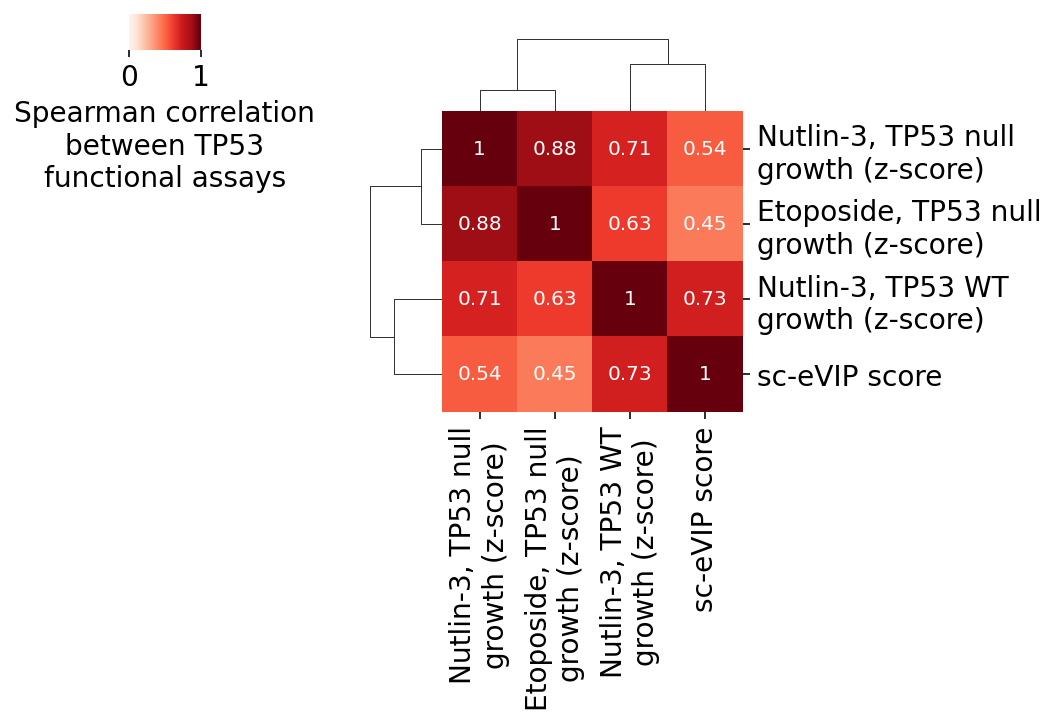

In [24]:
x=1
sns.clustermap(corr,vmin=0,vmax=1,cmap='Reds',
               cbar_pos=(-0.3,0.95,0.1,0.05),
               cbar_kws={'orientation':'horizontal',
                        'label':'Spearman correlation\nbetween TP53\nfunctional assays'},
               #col_cluster=False,row_cluster=False,
               annot=True,
               figsize=(5,5),
              )
plt.savefig(FIGS+'/'+PROTEIN+'.func_data_corr.pdf',bbox_inches = "tight") 
plt.savefig(FIGS+'/'+PROTEIN+'.func_data_corr.png',bbox_inches = "tight")

0 0
doing 0 0
0 1
doing 0 1
0 2
doing 0 2
0 3
doing 0 3
1 0
1 1
doing 1 1
1 2
doing 1 2
1 3
doing 1 3
2 0
2 1
2 2
doing 2 2
2 3
doing 2 3
3 0
3 1
3 2
3 3
doing 3 3


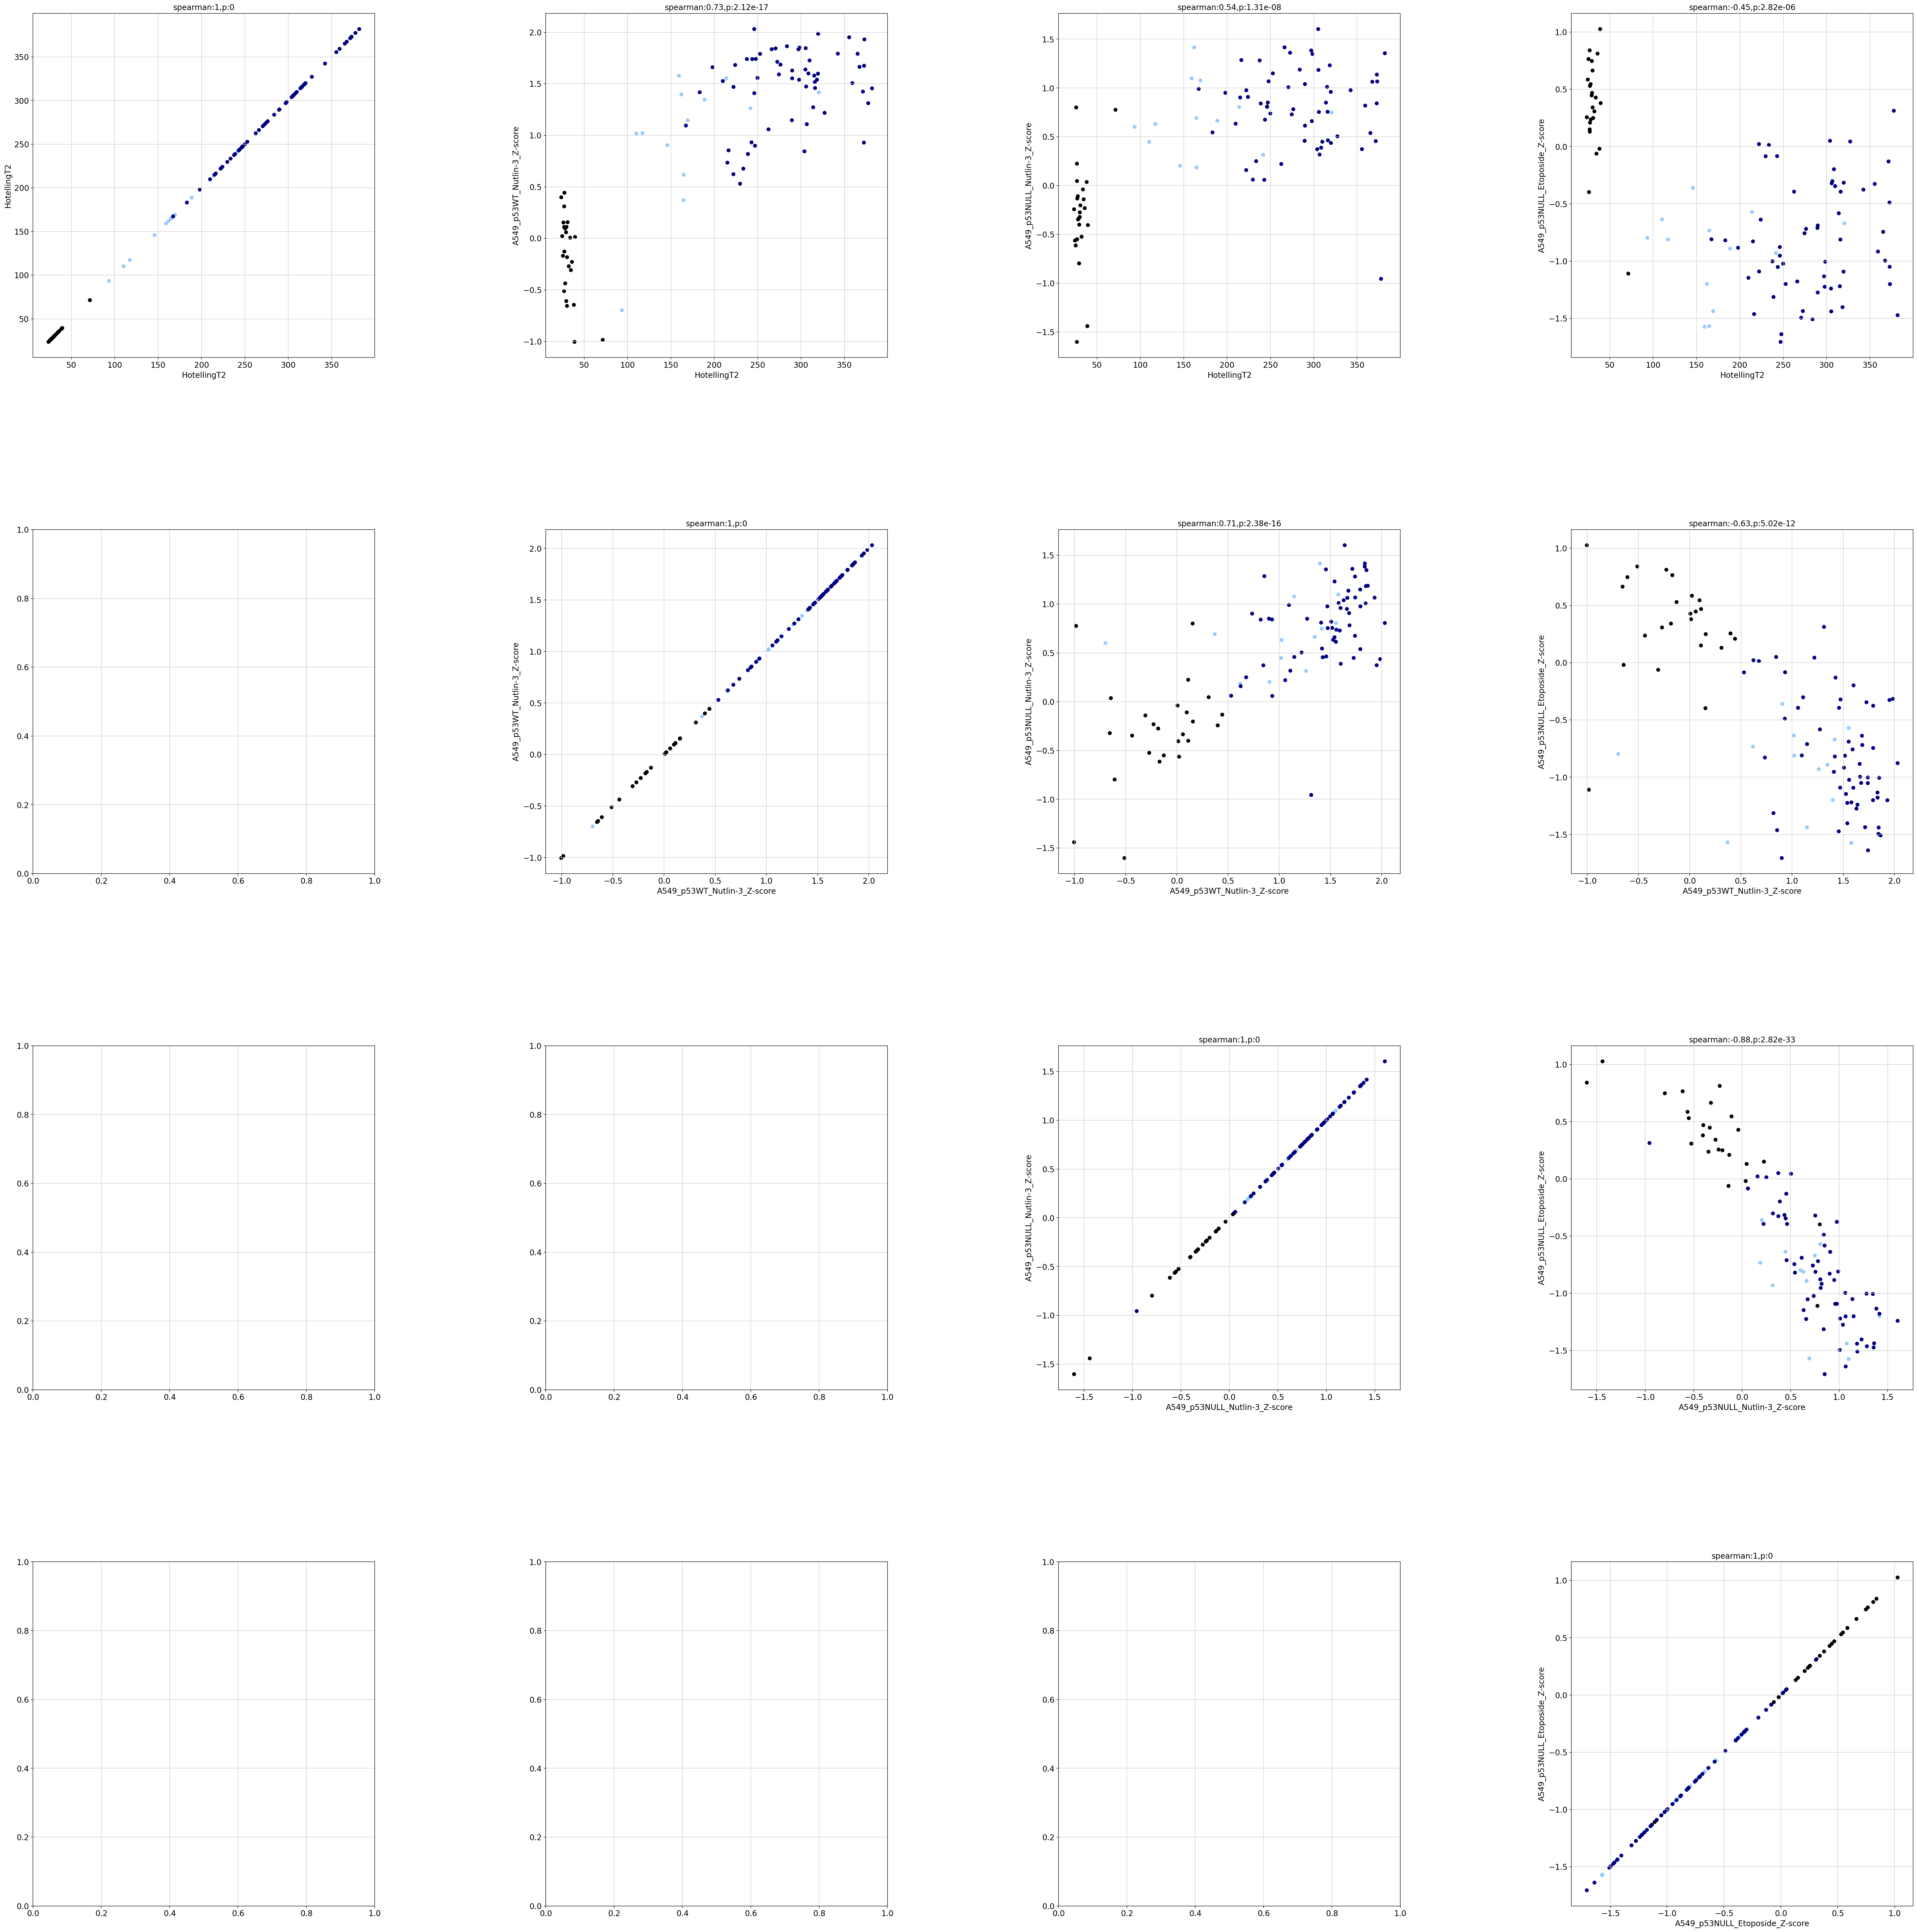

In [67]:
fig,plots=plt.subplots(len(assays),len(assays))
fig.set_size_inches(60,60)
fig.subplots_adjust(hspace=0.5,wspace=0.5)


for a1_idx in range(len(assays)):
    a1=assays[a1_idx]
    for a2_idx in range(len(assays)):
        a2=assays[a2_idx]
        print(a1_idx,a2_idx)
        if a1_idx>a2_idx:
            continue
        print('doing',a1_idx,a2_idx)
        
        fun_scatter(anno.loc[sorted_variants,a1],anno.loc[sorted_variants,a2],
            c=list(anno.loc[sorted_variants,'cluster_color']),ax=plots[a1_idx,a2_idx],
               xname=a1,yname=a2)